In [1]:
%matplotlib inline

In [2]:
# Copyright (c) 2022 MetPy Developers.
# Distributed under the terms of the BSD 3-Clause License.
# SPDX-License-Identifier: BSD-3-Clause

# Q-Vector

Use `metpy.calc.q_vector`.

This example demonstrates the q_vector calculation by computing them from the example xarray
Dataset and plotting using Matplotlib.

/var/folders/9w/czmy8vgn76376hx2704_y62w0000gp/T/ipykernel_38049/1659245995.py:12: UserWarning: Vertical dimension number not found. Defaulting to (..., Z, Y, X) order.
  tadv = mpcalc.advection(ds.temperature, ds.uwind, ds.vwind)


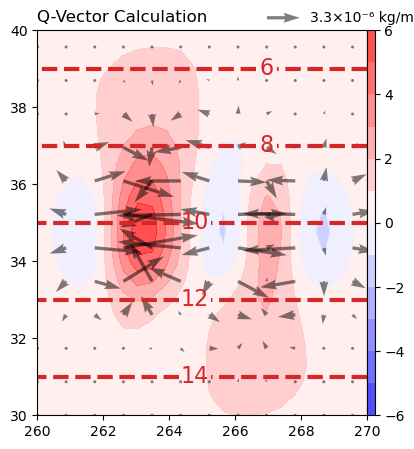

In [3]:
import matplotlib.pyplot as plt
import numpy as np

import metpy.calc as mpcalc
from metpy.cbook import example_data
from metpy.units import units

# load example data
ds = example_data()

# Calculate the temperature advection of the flow
tadv = mpcalc.advection(ds.temperature, ds.uwind, ds.vwind)

# Calculate the q-vectors. Passing in a fixed value of static stability, but could also
# use `mpcalc.static_stability()`.
u_qvect, v_qvect = mpcalc.q_vector(ds.uwind, ds.vwind, ds.temperature, 850 * units.hPa,
                                   static_stability=2e-6 * units('J / kg / Pa^2'))

# start figure and set axis
fig, ax = plt.subplots(figsize=(5, 5))

# plot isotherms
cs = ax.contour(ds.lon, ds.lat, ds.temperature, range(4, 26, 2), colors='tab:red',
                linestyles='dashed', linewidths=3)
plt.clabel(cs, fmt='%d', fontsize=16)

# plot temperature advection in Kelvin per 3 hours
cf = ax.contourf(ds.lon, ds.lat, tadv.metpy.convert_units('kelvin/hour') * 3, range(-6, 7, 1),
                 cmap=plt.cm.bwr, alpha=0.75)
plt.colorbar(cf, pad=0, aspect=50)

# calculate a scale length quantity of our vectors based on their mean
scale = (np.hypot(u_qvect, v_qvect).mean() * np.sqrt(u_qvect.size)).data

# plot Q-vectors as arrows, every other arrow
qvec = ax.quiver(ds.lon.values[::2], ds.lat.values[::2],
                 u_qvect[::2, ::2], v_qvect[::2, ::2],
                 color='black', scale=scale.m, alpha=0.5, width=0.01)

# calculate representative arrow for key
key = scale / 10

# add key for arrow length
qk = ax.quiverkey(qvec, 0.65, 0.905, key.m, f'{key:0.2~P}', labelpos='E',
                  coordinates='figure')

ax.set(xlim=(260, 270), ylim=(30, 40))
ax.set_title('Q-Vector Calculation', loc='left')

plt.show()